In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
short = pd.read_csv('brasileirao_2019.txt',sep=';', index_col=False)
short.data = pd.to_datetime(short.data)

In [3]:
short.head()

,data,time,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,2019-04-29,SAO,0.09395,0.10325,0.08720,0.0663,0.04635,0.05195,0.08015,0.09895,...,0.05585,0.05070,0.03820,0.02620,0.01735,0.00965,0.00280,0.00075,0.00015,0.0000
1,2019-04-29,CHA,0.04260,0.07205,0.08410,0.0876,0.06940,0.05605,0.06690,0.08215,...,0.06675,0.06730,0.06265,0.05060,0.03205,0.01695,0.00855,0.00225,0.00010,0.0000
2,2019-04-29,CAM,0.01420,0.04240,0.07850,0.0934,0.08180,0.05615,0.02800,0.01195,...,0.07780,0.07750,0.08260,0.09810,0.09225,0.05150,0.02330,0.00695,0.00035,0.0000
3,2019-04-29,FLA,0.04725,0.07585,0.09010,0.0869,0.07000,0.06175,0.07170,0.07410,...,0.07530,0.06930,0.05695,0.03720,0.02460,0.01435,0.00660,0.00135,0.00015,0.0000
4,2019-04-29,GRE,0.00000,0.00000,0.00015,0.0012,0.00430,0.00950,0.01595,0.02880,...,0.02385,0.00465,0.01315,0.03825,0.06270,0.08205,0.09920,0.16335,0.20115,0.1572


In [4]:
last_short = short[short['data'] == max(short['data'])]

In [5]:
short_final = last_short[last_short.columns[1:]].set_index('time')

In [6]:
short_final.sort_values(by=[str(i) for i in list(range(20,0,-1))], inplace=True)

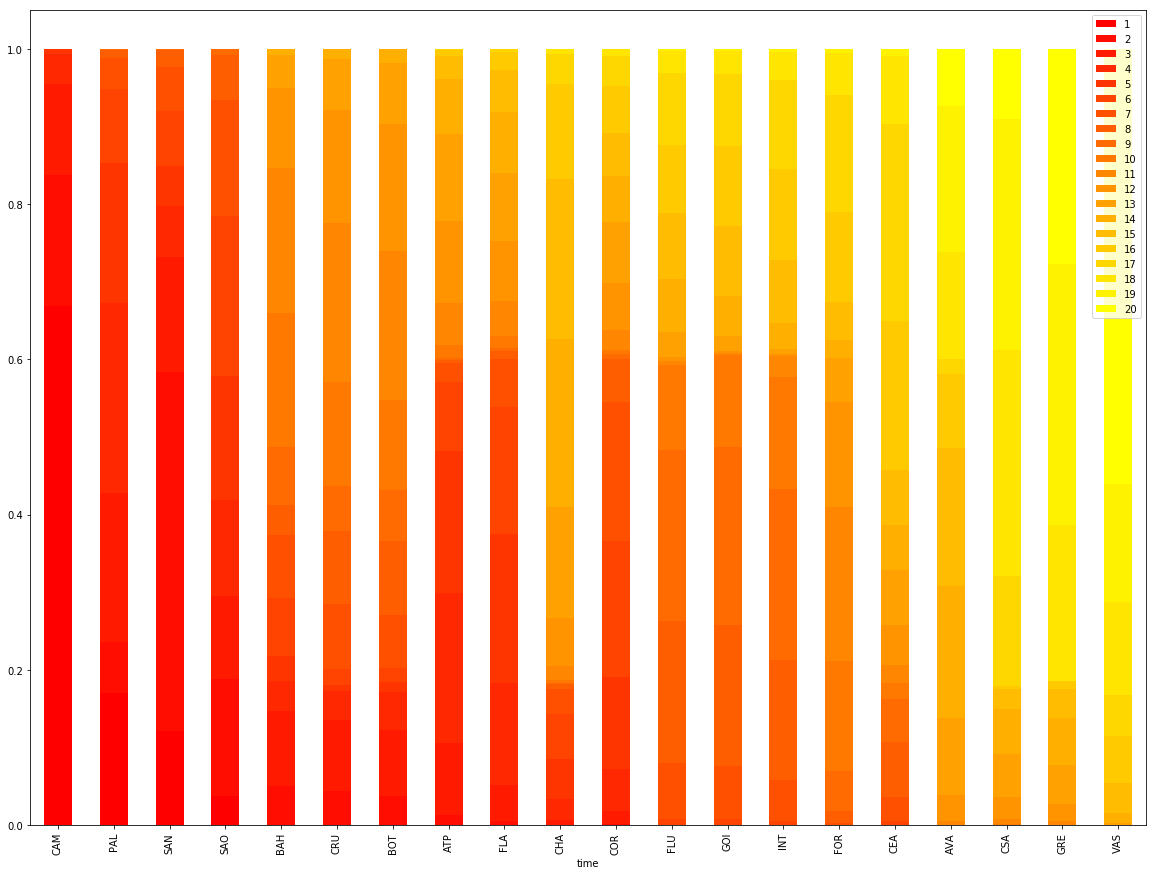

In [7]:
short_final.plot(kind='bar',stacked=True,figsize=(20,15), colormap='autumn')

In [9]:
long = pd.read_csv('brasileirao_long_2019.txt',sep=';', index_col=False, decimal=',')
long.data = pd.to_datetime(long.data)

In [66]:
long['points'] = (20-long['pos']) * long['chance']
long2 = long.groupby(['data','time'])['points'].mean().unstack()

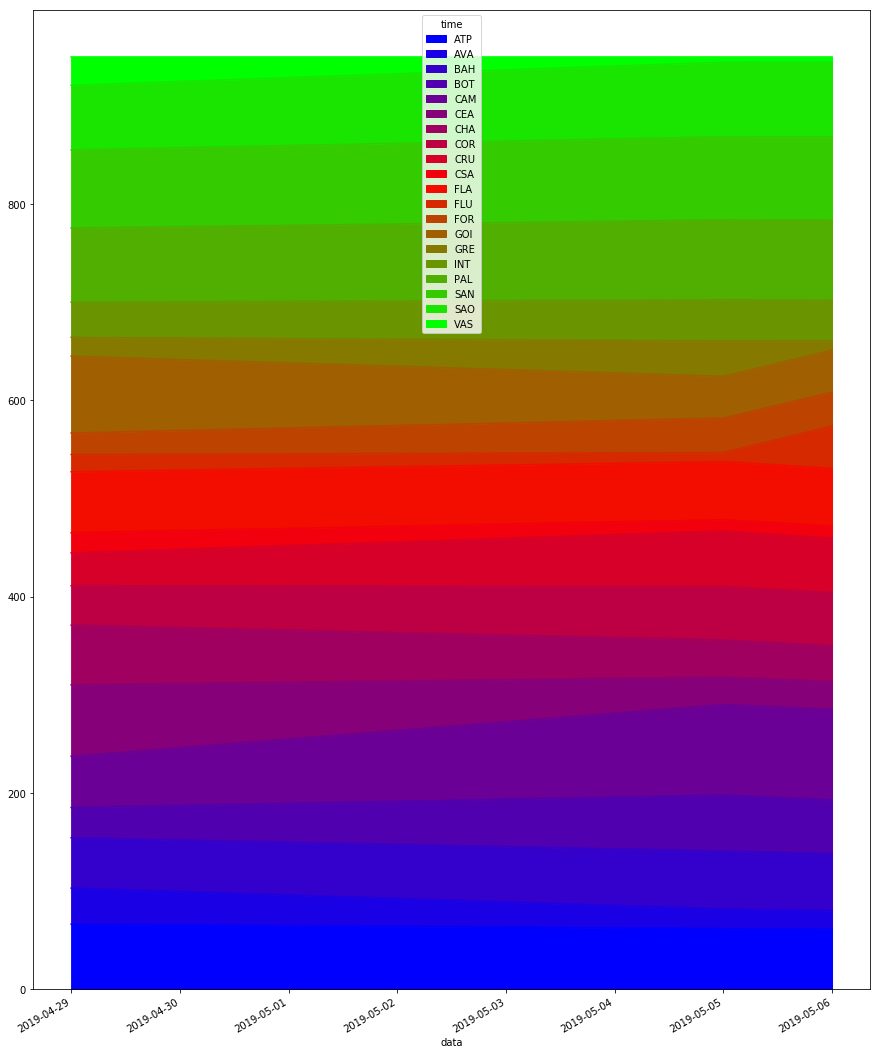

In [75]:
long2.sort_values(long2.columns.max()).plot(kind='area',stacked=True,figsize=(15,20), colormap='brg')

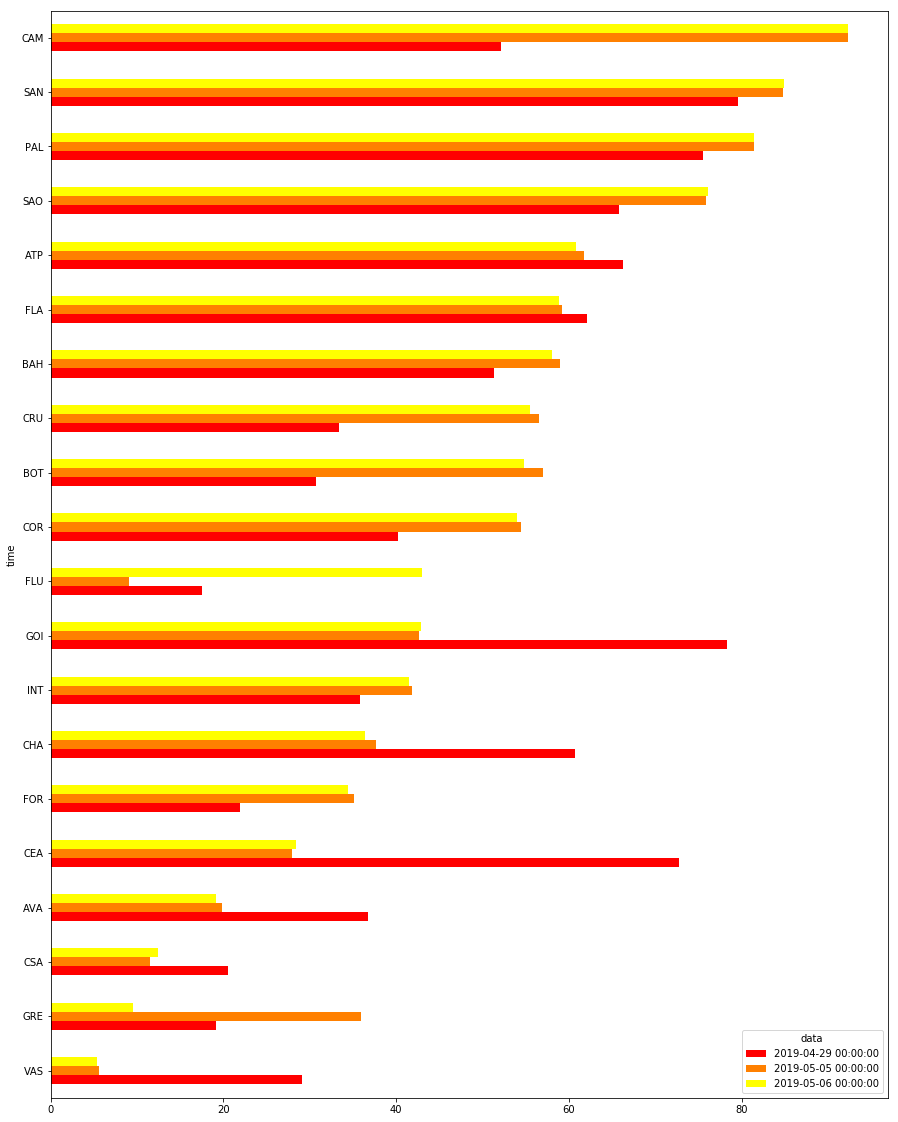

In [76]:
long2 = long.groupby(['time','data'])['points'].mean().unstack()
long2.sort_values(long2.columns.max()).plot(kind='barh',stacked=False,figsize=(15,20), colormap='autumn')